# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

# Utilizei link do github já formatado devido desatualização de boston
# deste modo, os dados são os mesmos.

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


- Variáveis adequadas, uma vez que Scikit-learn não aceita variáveis string nem missing.

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [5]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- Após análise de correlação, a variavél 'rm' possui maior valor correlativo, sendo o maior potêncial. Tendo também como interesse o 'lstat' com o menor valor correlativo.

### 3. Separe os dados em validação e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (379, 13)
X_test: (127, 13)
y_train: (379, 1)
y_test: (127, 1)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [7]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [8]:
mse1 = mean_squared_error(y_train, regr_1.predict(X_train))
mse2 = mean_squared_error(y_train, regr_2.predict(X_train))

template = "O MSE da árvore treino com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


O MSE da árvore treino com profundidade=2 é: 25,85
O MSE da árvore treino com profundidade=8 é: 1,80


In [9]:
mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse2 = mean_squared_error(y_test, regr_2.predict(X_test))

template = "O MSE da árvore teste com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


O MSE da árvore teste com profundidade=2 é: 26,46
O MSE da árvore teste com profundidade=8 é: 12,19


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

- Com base nos itens anteriores, a árvore mais adequada é a 'regr_2' com profundidade = 8.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

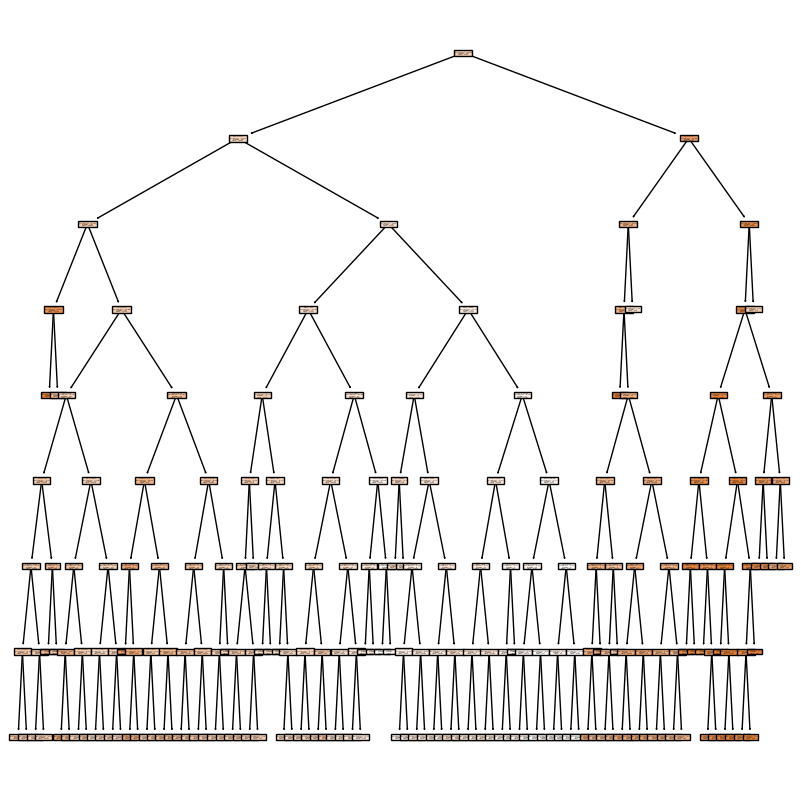

In [10]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_2,
                    feature_names=X.columns,
                    filled=True)

In [11]:
representacao_textual = tree.export_text(regr_2)
print(representacao_textual)

|--- feature_5 <= 6.98
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.43
|   |   |   |--- feature_0 <= 10.59
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.59
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.43
|   |   |   |--- feature_5 <= 6.59
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_8 <= 7.50
|   |   |   |   |   |   |--- feature_10 <= 19.65
|   |   |   |   |   |   |   |--- feature_9 <= 262.00
|   |   |   |   |   |   |   |   |--- value: [26.56]
|   |   |   |   |   |   |   |--- feature_9 >  262.00
|   |   |   |   |   |   |   |   |--- value: [23.85]
|   |   |   |   |   |   |--- feature_10 >  19.65
|   |   |   |   |   |   |   |--- feature_11 <= 381.45
|   |   |   |   |   |   |   |   |--- value: [20.60]
|   |   |   |   |   |   |   |--- feature_11 >  381.45
|   |   |   |   |   |   |   |   |--- value: [22.23]
|   |   |   |   |   |--- feature_8 >  7.50
|   |   |   |   |   |   |--- feature_8 <= 16.00
|   |   |   |

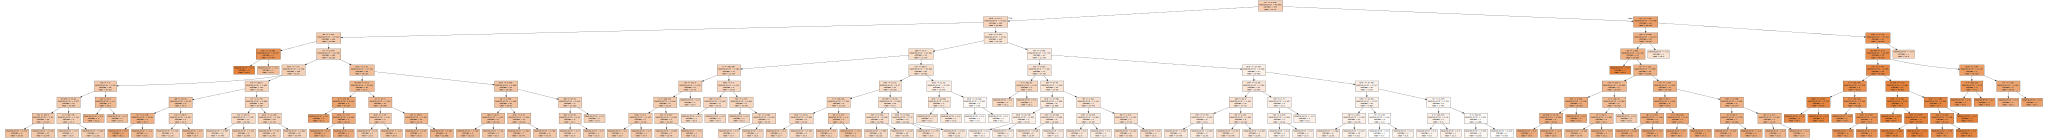

In [12]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

- A variável que aparenta ser mais importante é a 'feature_12' ou 'LSAT (% status inferior da população)' , pois foi utilizada em 20 quebras, sendo a variável mais utilizada para condicionar as quebras nos diversos nós da árvore.